In [2]:
# Using toy images to understand reconstruction

In [3]:
import astropy.units as u

# %matplotlib inline
from matplotlib import pyplot as plt

from ctapipe.image import dilate, tailcuts_clean, toymodel
from ctapipe.instrument import SubarrayDescription
from ctapipe.visualization import CameraDisplay

In [5]:
subarray = SubarrayDescription.read("dataset://gamma_prod5.simtel.zst")
geom = subarray.tel[100].camera.geometry

In [6]:
subarray.tel[100]

TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam')

In [7]:
subarray.tel[100].camera

CameraDescription(name=NectarCam, geometry=NectarCam, readout=NectarCam)

In [45]:
# Create a fake camera image to display:
model = toymodel.Gaussian(
     x=0.2 * u.m,
     y=0.2 * u.m,
     width=0.1 * u.m,
     length=0.3 * u.m,
     psi="35d",
)

image, sig, bg = model.generate_image(geom, intensity=1500, nsb_level_pe=5)

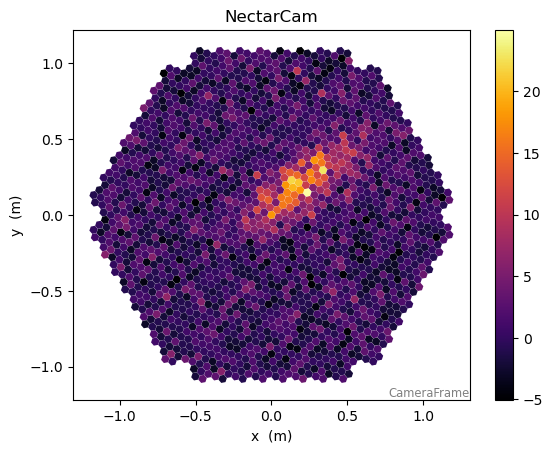

In [46]:
disp = CameraDisplay(geom, image)
disp.add_colorbar()

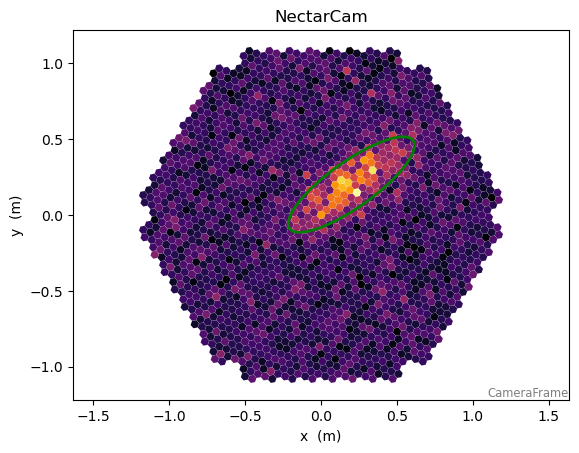

In [47]:
c= CameraDisplay(geom, image, allow_pick=True)
c.add_colorbar=True
c.enable_pixel_picker()
c.add_ellipse(centroid=(0.2,0.2), length=1, width=0.3, angle=120, asymmetry=0.0, color="green", lw=2)
c.update()

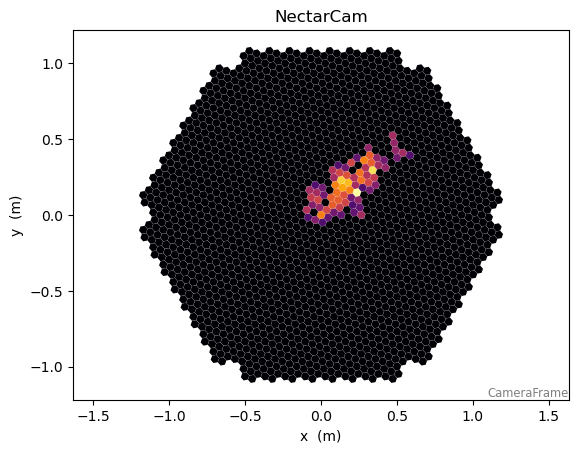

In [48]:
cleanmask = tailcuts_clean(geom, image, picture_thresh=10, boundary_thresh=5)
clean = image.copy()
clean[~cleanmask] = 0.0

disp = CameraDisplay(geom, image=clean)


Now, get Hilas parameters directly from cleaned image

In [49]:
from ctapipe.image import hillas_parameters

In [50]:
params = hillas_parameters(geom, clean)
print(params)

{'intensity': np.float64(851.2776280323449),
 'kurtosis': np.float64(2.528520531380112),
 'length': <Quantity 0.18591278 m>,
 'length_uncertainty': <Quantity 0.00393894 m>,
 'phi': <Angle 0.81650119 rad>,
 'psi': <Angle 0.6768122 rad>,
 'psi_uncertainty': <Angle 0.01258948 rad>,
 'r': <Quantity 0.27714075 m>,
 'skewness': np.float64(0.32242774551427483),
 'transverse_cog_uncertainty': <Quantity 0.00156288 m>,
 'width': <Quantity 0.07271048 m>,
 'width_uncertainty': <Quantity 0.00165325 m>,
 'x': <Quantity 0.1897791 m>,
 'y': <Quantity 0.20196754 m>}


Overlay on image

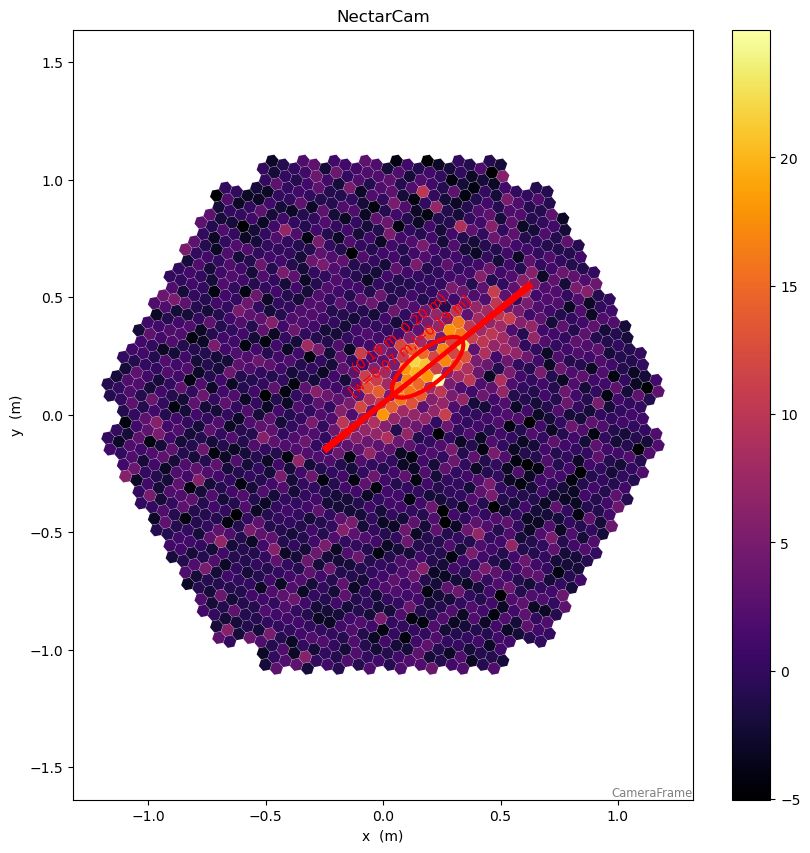

In [53]:

plt.figure(figsize=(10, 10))
disp = CameraDisplay(geom, image=image)
disp.add_colorbar()
disp.overlay_moments(params, color="red", lw=3)


## Number of island

In [57]:
model = toymodel.Gaussian(
     x=0.2 * u.m,
     y=0.2 * u.m,
     width=0.1 * u.m,
     length=0.3 * u.m,
     psi="35d",
)

#lets say we have high nsb
image, sig, bg = model.generate_image(geom, intensity=1000, nsb_level_pe=30)

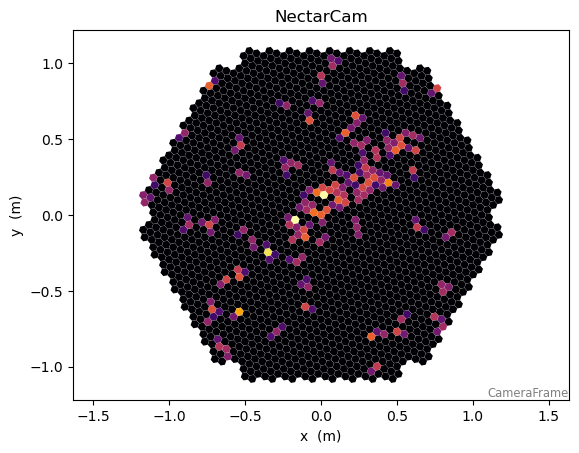

In [58]:
cleanmask = tailcuts_clean(geom, image, picture_thresh=10, boundary_thresh=5)
clean = image.copy()
clean[~cleanmask] = 0.0

disp = CameraDisplay(geom, image=clean)


In [59]:
from ctapipe.image import brightest_island, number_of_islands

In [64]:
n, pos = number_of_islands(geom, cleanmask)
n

46

In [65]:
brightest_island(n, pos, image)

array([False, False, False, ..., False, False, False], shape=(1855,))

In [66]:
params = hillas_parameters(geom, clean)
print(params)

{'intensity': np.float64(1926.8328840970353),
 'kurtosis': np.float64(2.3193437629627707),
 'length': <Quantity 0.50233002 m>,
 'length_uncertainty': <Quantity 0.00657228 m>,
 'phi': <Angle 1.68141107 rad>,
 'psi': <Angle 0.65679205 rad>,
 'psi_uncertainty': <Angle 0.04277754 rad>,
 'r': <Quantity 0.05299714 m>,
 'skewness': np.float64(-0.3140831021194851),
 'transverse_cog_uncertainty': <Quantity 0.00103882 m>,
 'width': <Quantity 0.43143766 m>,
 'width_uncertainty': <Quantity 0.0082126 m>,
 'x': <Quantity -0.00585032 m>,
 'y': <Quantity 0.05267325 m>}


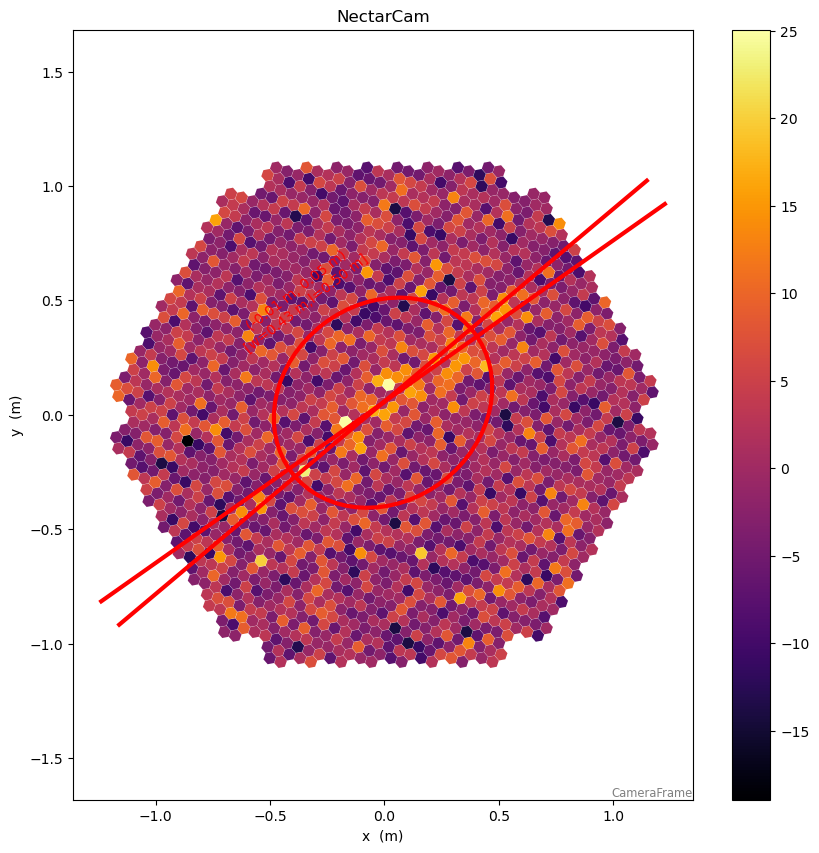

In [67]:
plt.figure(figsize=(10, 10))
disp = CameraDisplay(geom, image=image)
disp.add_colorbar()
disp.overlay_moments(params, color="red", lw=3)

In this case, we end up with a bad reconstruction.